# RASPAGEM DE DADOS

Esse projeto é desenvolvido a partir de um interesse pessoal em jogos de league of legends para explorar
os resultados . Os jogos foram extraídos do site  lol.fandom.com

O primeiro desafio do projeto foi puxar as informações da internet e organizá-los de uma forma que fizesse sentido à análise,
depois disso as informações foram salvas em um dataframe e iniciou-se o projeto de análise.

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Links que serão acessados (Apenas dias do evento principal)
url = []
url.append('https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards')
url.append('https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_2')
url.append('https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_3')
url.append('https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_4')
url.append('https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_5')
url.append('https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_6')
url.append('https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_7')


url

['https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards',
 'https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_2',
 'https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_3',
 'https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_4',
 'https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_5',
 'https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_6',
 'https://lol.fandom.com/wiki/2021_Season_World_Championship/Main_Event/Scoreboards/Day_7']

In [4]:
# Capturando nome dos campeões utilizados em todas as partidas

In [5]:
tag_champs = []
for g in range(len(url)):
    tag_champs.append(BeautifulSoup(urlopen(url[g]),'lxml').find_all('div', class_='sb-p-champion'))

In [6]:
champ = []
for a in range(len(tag_champs)):
    for j in range(len(tag_champs[a])):
        champ.append(tag_champs[a][j].find("span")['title'])

In [7]:
import numpy as np
nx = np.split(np.array(champ),int(len(champ)/5))

In [8]:
# Nome dos times que jogaram cada partida

In [9]:
html = []
for d in range(len(url)):
    html.append(pd.read_html(url[d],attrs={'class': 'sb'}, header=0))

In [10]:
# OBTENDO OS TÍTULOS DOS RÓTULOS
nome = ''
t = []
for o in range(0,len(url)):
    for p in range(0,len(html[o])):
        nome = html[o][p].columns[:1:3][0]
        t.append(nome[2:])

        nome = html[o][p].columns[3::3][0]
        nome = repr(nome).split("\\")
        t.append(nome[0][1:])

            
t

['DWG KIA',
 'FunPlus Phoenix',
 'RNG',
 'PSG Talon',
 'Hanwha Life',
 'Fnatic',
 'LNG Esports',
 'Gen.G',
 'T1',
 'DetonatioN FM',
 'EDward Gaming',
 '100 Thieves',
 'Team Liquid',
 'MAD Lions',
 'Rogue',
 'Cloud9',
 'T1',
 'EDward Gaming',
 'Rogue',
 'DWG KIA',
 'PSG Talon',
 'Hanwha Life',
 'Fnatic',
 'RNG',
 'Cloud9',
 'FunPlus Phoenix',
 'DetonatioN FM',
 '100 Thieves',
 'MAD Lions',
 'Gen.G',
 'Team Liquid',
 'LNG Esports',
 'RNG',
 'Hanwha Life',
 'MAD Lions',
 'LNG Esports',
 'FunPlus Phoenix',
 'Rogue',
 'PSG Talon',
 'Fnatic',
 'Gen.G',
 'Team Liquid',
 'DWG KIA',
 'Cloud9',
 'EDward Gaming',
 'DetonatioN FM',
 '100 Thieves',
 'T1',
 'FunPlus Phoenix',
 'DWG KIA',
 'Cloud9',
 'Rogue',
 'FunPlus Phoenix',
 'Cloud9',
 'DWG KIA',
 'Rogue',
 'Rogue',
 'FunPlus Phoenix',
 'Cloud9',
 'DWG KIA',
 'DetonatioN FM',
 'EDward Gaming',
 'T1',
 '100 Thieves',
 'EDward Gaming',
 'T1',
 '100 Thieves',
 'DetonatioN FM',
 'DetonatioN FM',
 'T1',
 '100 Thieves',
 'EDward Gaming',
 'Hanwha Life

### Separando os resultados mais importantes dos jogos

In [11]:
# OBTENDO OS DADOS DAS LINHAS
lista = []
for z in range(len(url)):
    for l in range(len(html[z])):
        lista = np.append(lista,html[z][l][1::4])

    
lista

array(['Victory 59.1k 18', '29:41', '29:41', 'Defeat 44.1k 2',
       '11 2 1 3 2', '11 2 1 3 2', '2 0 0 0 0', '2 0 0 0 0',
       'Victory 69.7k 16', '37:26', '37:26', 'Defeat 61.6k 9',
       '11 3 0 4 2', '11 3 0 4 2', '3 0 1 1 0', '3 0 1 1 0',
       'Victory 65.6k 25', '31:42', '31:42', 'Defeat 50k 5', '9 1 2 3 1',
       '9 1 2 3 1', '2 0 0 1 1', '2 0 0 1 1', 'Defeat 37k 1', '23:42',
       '23:42', 'Victory 42.9k 8', '3 0 0 0 0', '3 0 0 0 0', '8 1 0 4 2',
       '8 1 0 4 2', 'Victory 46k 22', '19:53', '19:53', 'Defeat 28.8k 2',
       '11 3 0 1 2', '11 3 0 1 2', '0 0 0 0 0', '0 0 0 0 0',
       'Victory 60.1k 19', '28:31', '28:31', 'Defeat 44.6k 6',
       '9 1 1 3 2', '9 1 1 3 2', '1 0 0 0 0', '1 0 0 0 0',
       'Victory 51k 16', '27:08', '27:08', 'Defeat 44.6k 9', '8 1 1 2 2',
       '8 1 1 2 2', '2 0 0 1 0', '2 0 0 1 0', 'Victory 65k 16', '32:34',
       '32:34', 'Defeat 51.8k 8', '10 2 1 2 2', '10 2 1 2 2', '1 0 0 1 0',
       '1 0 0 1 0', 'Defeat 59.5k 4', '36:49', '36:49'

In [12]:
resultado = []
for i in range(int(len(t)/2)):
    resultado.append(lista[i*8].split(' ') +  lista[1+(i*8)].split(' ') + lista[4+(8*i)].split(" "))
    resultado.append(lista[3+(i*8)].split(' ') +  lista[1+(i*8)].split(' ') + lista[6+(i*8)].split(" "))
    
resultado
    

[['Victory', '59.1k', '18', '29:41', '11', '2', '1', '3', '2'],
 ['Defeat', '44.1k', '2', '29:41', '2', '0', '0', '0', '0'],
 ['Victory', '69.7k', '16', '37:26', '11', '3', '0', '4', '2'],
 ['Defeat', '61.6k', '9', '37:26', '3', '0', '1', '1', '0'],
 ['Victory', '65.6k', '25', '31:42', '9', '1', '2', '3', '1'],
 ['Defeat', '50k', '5', '31:42', '2', '0', '0', '1', '1'],
 ['Defeat', '37k', '1', '23:42', '3', '0', '0', '0', '0'],
 ['Victory', '42.9k', '8', '23:42', '8', '1', '0', '4', '2'],
 ['Victory', '46k', '22', '19:53', '11', '3', '0', '1', '2'],
 ['Defeat', '28.8k', '2', '19:53', '0', '0', '0', '0', '0'],
 ['Victory', '60.1k', '19', '28:31', '9', '1', '1', '3', '2'],
 ['Defeat', '44.6k', '6', '28:31', '1', '0', '0', '0', '0'],
 ['Victory', '51k', '16', '27:08', '8', '1', '1', '2', '2'],
 ['Defeat', '44.6k', '9', '27:08', '2', '0', '0', '1', '0'],
 ['Victory', '65k', '16', '32:34', '10', '2', '1', '2', '2'],
 ['Defeat', '51.8k', '8', '32:34', '1', '0', '0', '1', '0'],
 ['Defeat', '59

In [13]:
# inserindo campeões no final
for q in range(len(resultado)):
    resultado[q].append(nx[q][0])
    resultado[q].append(nx[q][1])
    resultado[q].append(nx[q][2])
    resultado[q].append(nx[q][3])
    resultado[q].append(nx[q][4])

In [14]:
# Inserindo o time no início
for f in range(len(resultado)):
    resultado[f].insert(0,t[f])
    

In [15]:
# Cruzando o nome dos times com os resultados para montar o dataframe

In [16]:
# Abrindo o dataframe com colunas nomeadas
import pandas as pd
df = pd.DataFrame(resultado,columns=['time','jogo', 'ouro', 'abates','tempo','torres','inibidores','barons','dragons','arautos','top','jg','mid','adc','sup'])

In [17]:
# Reescrevendo a coluna ouro pra transformar em num
df['ouro'] = df['ouro'].apply(lambda x: float(x.replace('k','')))

In [18]:
# Convertendo ouro pra num
df['ouro'] = pd.to_numeric(df['ouro'])

In [19]:
df.head()

,time,jogo,ouro,abates,tempo,torres,inibidores,barons,dragons,arautos,top,jg,mid,adc,sup
0,DWG KIA,Victory,59.1,18,29:41,11,2,1,3,2,Graves,Trundle,LeBlanc,Miss Fortune,Yuumi
1,FunPlus Phoenix,Defeat,44.1,2,29:41,2,0,0,0,0,Jayce,Jarvan IV,Galio,Kai'Sa,Nautilus
2,RNG,Victory,69.7,16,37:26,11,3,0,4,2,Syndra,Jarvan IV,Twisted Fate,Miss Fortune,Rell
3,PSG Talon,Defeat,61.6,9,37:26,3,0,1,1,0,Kennen,Lee Sin,Tryndamere,Aphelios,Thresh
4,Hanwha Life,Victory,65.6,25,31:42,9,1,2,3,1,Kennen,Lee Sin,Yasuo,Aphelios,Thresh


In [20]:
# Criando variável dummy em coluna única para definir vitória/derrota
df['jogo'] = pd.get_dummies(pd.get_dummies(df.jogo,prefix=[1,0],drop_first=True))

In [21]:
# convertendo tmepo para uma var numerica
tempos= []
for i in range(len(df)):
    tempos.append(df.tempo[i].replace(':','.'))

In [22]:
# Definindo  o lado (AZUL = 0, VERMELHO = 1)
df['lado'] = [0,1]*int(len(df)/2)

In [23]:
# Convertendo a coluna tempo para numerico apenas para tornar mais simples as operações 
df.tempo = pd.to_numeric(tempos)
df

,time,jogo,ouro,abates,tempo,torres,inibidores,barons,dragons,arautos,top,jg,mid,adc,sup,lado
0,DWG KIA,1,59.1,18,29.41,11,2,1,3,2,Graves,Trundle,LeBlanc,Miss Fortune,Yuumi,0
1,FunPlus Phoenix,0,44.1,2,29.41,2,0,0,0,0,Jayce,Jarvan IV,Galio,Kai'Sa,Nautilus,1
2,RNG,1,69.7,16,37.26,11,3,0,4,2,Syndra,Jarvan IV,Twisted Fate,Miss Fortune,Rell,0
3,PSG Talon,0,61.6,9,37.26,3,0,1,1,0,Kennen,Lee Sin,Tryndamere,Aphelios,Thresh,1
4,Hanwha Life,1,65.6,25,31.42,9,1,2,3,1,Kennen,Lee Sin,Yasuo,Aphelios,Thresh,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Team Liquid,0,62.5,10,37.14,4,0,0,2,0,Jarvan IV,Trundle,Twisted Fate,Aphelios,Thresh,1
92,Team Liquid,1,65.5,16,35.03,9,2,1,5,1,Gnar,Lee Sin,Syndra,Jhin,Rakan,0
93,Gen.G,0,59.9,9,35.03,6,0,0,0,1,Renekton,Taliyah,Yone,Miss Fortune,Leona,1
94,LNG Esports,0,51.6,7,31.22,2,0,0,2,0,Jax,Lee Sin,Irelia,Ziggs,Leona,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        96 non-null     object 
 1   jogo        96 non-null     uint8  
 2   ouro        96 non-null     float64
 3   abates      96 non-null     object 
 4   tempo       96 non-null     float64
 5   torres      96 non-null     object 
 6   inibidores  96 non-null     object 
 7   barons      96 non-null     object 
 8   dragons     96 non-null     object 
 9   arautos     96 non-null     object 
 10  top         96 non-null     object 
 11  jg          96 non-null     object 
 12  mid         96 non-null     object 
 13  adc         96 non-null     object 
 14  sup         96 non-null     object 
 15  lado        96 non-null     int64  
dtypes: float64(2), int64(1), object(12), uint8(1)
memory usage: 11.5+ KB


In [25]:
df['abates'] = pd.to_numeric(df.abates)
df['torres'] = pd.to_numeric(df.torres)
#df['inibidores'] = pd.to_numeric(df.inibidores)
df['barons'] = pd.to_numeric(df.barons)
df['dragons'] = pd.to_numeric(df.dragons)
#df['arautos'] = pd.to_numeric(df.arautos)

In [26]:
df.to_csv('worlds2021.csv')

## Carregando o conjunto criado

In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('worlds2021.csv',index_col=0)
df.set_index('time',inplace=True)
df.head()

,jogo,ouro,abates,tempo,torres,inibidores,barons,dragons,arautos,top,jg,mid,adc,sup,lado
time,,,,,,,,,,,,,,,
DWG KIA,1,59.1,18,29.41,11,2,1,3,2,Graves,Trundle,LeBlanc,Miss Fortune,Yuumi,0
FunPlus Phoenix,0,44.1,2,29.41,2,0,0,0,0,Jayce,Jarvan IV,Galio,Kai'Sa,Nautilus,1
RNG,1,69.7,16,37.26,11,3,0,4,2,Syndra,Jarvan IV,Twisted Fate,Miss Fortune,Rell,0
PSG Talon,0,61.6,9,37.26,3,0,1,1,0,Kennen,Lee Sin,Tryndamere,Aphelios,Thresh,1
Hanwha Life,1,65.6,25,31.42,9,1,2,3,1,Kennen,Lee Sin,Yasuo,Aphelios,Thresh,0


In [29]:
#separando os campeões por time
df.index.unique()

Index(['DWG KIA', 'FunPlus Phoenix', 'RNG', 'PSG Talon', 'Hanwha Life',
       'Fnatic', 'LNG Esports', 'Gen.G', 'T1', 'DetonatioN FM',
       'EDward Gaming', '100 Thieves', 'Team Liquid', 'MAD Lions', 'Rogue',
       'Cloud9'],
      dtype='object', name='time')

In [30]:
# Média dos resultados dos times durante a vitória derrota
round(df.groupby(['time','jogo']).mean(),2)

ouro  abates  tempo  torres  inibidores  barons  \
time            jogo                                                     
100 Thieves     0     45.77    4.00  29.76    1.33        0.00    0.33   
                1     72.43   20.00  39.20    8.33        1.00    0.67   
Cloud9          0     59.40   10.75  34.91    3.50        0.25    0.25   
                1     55.55   17.50  26.68    9.00        1.00    1.00   
DWG KIA         1     66.75   17.00  34.02   10.00        2.17    1.33   
DetonatioN FM   0     48.92    7.50  31.06    2.50        0.50    0.33   
EDward Gaming   0     48.20    2.50  30.42    2.50        0.00    0.00   
                1     61.85   16.25  30.58   10.00        2.00    0.75   
Fnatic          0     64.50   13.60  37.51    3.80        0.00    0.20   
                1     75.30   26.00  37.31   10.00        2.00    2.00   
FunPlus Phoenix 0     52.30    6.00  31.92    3.50        0.25    0.25   
                1     66.30   15.50  35.34    8.50        1.00    1.00   
Gen.G           0     65.53   11.67  38.65    4.33        0.33    0.67   
                1     64.67   16.33  33.72    9.00        2.00    1.00   
Hanwha Life     0     65.95   12.50  39.16    4.00        0.00    1.00   
                1     68.50   20.25  35.07    9.25        1.50    1.50   
LNG Esports     0     45.93    4.00  28.26    3.00        0.00    0.00   
                1     57.73   19.00  29.89    9.00        1.67    0.33   
MAD Lions       0     52.67    9.00  30.93    4.00        0.33    0.67   
                1     76.00   20.67  38.32   10.33        2.67    2.00   
PSG Talon       0     52.30    6.33  33.03    2.33        0.00    0.33   
                1     77.23   24.67  40.18    9.67        2.33    2.00   
RNG             0     61.95   16.50  36.72    4.00        0.00    0.00   
                1     67.53   19.75  35.06    9.75        1.75    0.50   
Rogue           0     54.30    8.00  33.45    2.50        0.00    0.25   
                1     70.25   18.50  36.46   10.00        1.50    0.50   
T1              0     59.50    4.00  36.49    3.00        0.00    1.00   
                1     52.18   14.00  26.60   10.00        2.00    0.60   
Team Liquid     0     57.07    8.67  34.83    2.67        0.00    0.33   
                1     58.07   14.67  30.75    9.33        1.67    1.00   

                      dragons  arautos  lado  
time            jogo                          
100 Thieves     0        0.67     0.00  0.67  
                1        4.00     1.33  0.33  
Cloud9          0        1.75     0.75  0.50  
                1        2.50     1.50  0.50  
DWG KIA         1        3.33     1.17  0.50  
DetonatioN FM   0        1.00     0.50  0.50  
EDward Gaming   0        0.50     0.50  0.50  
                1        2.75     1.50  0.50  
Fnatic          0        1.80     1.00  0.40  
                1        4.00     1.00  1.00  
FunPlus Phoenix 0        1.00     1.00  0.50  
                1        3.50     1.50  0.50  
Gen.G           0        1.00     0.67  0.67  
                1        3.67     1.33  0.33  
Hanwha Life     0        2.50     1.50  1.00  
                1        3.75     1.50  0.25  
LNG Esports     0        1.33     0.00  0.00  
                1        3.33     0.67  1.00  
MAD Lions       0        0.67     1.33  0.67  
                1        3.00     1.67  0.33  
PSG Talon       0        0.67     0.33  0.67  
                1        3.33     1.00  0.33  
RNG             0        1.50     0.50  0.50  
                1        3.25     1.00  0.50  
Rogue           0        0.75     0.50  0.75  
                1        2.50     1.00  0.00  
T1              0        0.00     0.00  0.00  
                1        2.00     2.00  0.60  
Team Liquid     0        1.67     0.67  0.67  
                1        3.33     1.67  0.33

Em todos os jogos há um confronto entre dois times, por isso vamos cruzar os resultados históricos de para buscar semelhanças entre as escolhas de campeões. Vamos checar se dois times escolhem com frequência campeões iguais, para isso podemos calcular a frequência de escolhas.

In [31]:
# Escolhendo 2 times que irão jogar para observar seus resultados
time1 = 'DWG KIA'
time2 = 'Cloud9'

In [32]:
pd.concat([df.loc[time1],df.loc[time2]])

,jogo,ouro,abates,tempo,torres,inibidores,barons,dragons,arautos,top,jg,mid,adc,sup,lado
time,,,,,,,,,,,,,,,
DWG KIA,1,59.1,18,29.41,11,2,1,3,2,Graves,Trundle,LeBlanc,Miss Fortune,Yuumi,0
DWG KIA,1,69.2,15,37.03,8,1,0,5,2,Jax,Talon,Ryze,Aphelios,Lulu,1
DWG KIA,1,64.4,15,32.27,11,4,2,4,2,Graves,Xin Zhao,Twisted Fate,Jhin,Rell,0
DWG KIA,1,57.6,14,29.56,9,1,1,2,0,Jayce,Poppy,Twisted Fate,Miss Fortune,Leona,1
DWG KIA,1,74.1,19,37.29,10,2,2,4,1,Lucian,Qiyana,Twisted Fate,Draven,Thresh,0
DWG KIA,1,76.1,21,38.58,11,3,2,2,0,Jax,Lee Sin,Kassadin,Miss Fortune,Shen,1
Cloud9,0,51.8,8,32.34,1,0,0,1,0,Gnar,Xin Zhao,Sylas,Miss Fortune,Yuumi,1
Cloud9,0,69.9,13,36.44,9,1,1,2,1,Camille,Qiyana,Ryze,Ezreal,Leona,0
Cloud9,0,51.0,7,32.27,1,0,0,0,0,Jax,Qiyana,Ryze,Miss Fortune,Leona,1


In [33]:
def frequencia(s):
    dicx = {}
    for n in s:
        if n not in dicx:
            dicx[n] = 1
        else:
            dicx[n] +=1
    return dicx

In [34]:
# Os 5 champs mais usados - time 1
h_1 = frequencia(df.loc[time1].iloc[:,9:14].values.flatten())
num = 0
for i in sorted(h_1, key = h_1.get, reverse=True):
    print(i, h_1[i])
    num +=1
    if num > 5:
        break

Miss Fortune 3
Twisted Fate 3
Graves 2
Jax 2
Trundle 1
LeBlanc 1


In [35]:
# Os 5 champs mais usados - time 2
h_2 = frequencia(df.loc[time2].iloc[:,9:14].values.flatten())
num = 0
for i in sorted(h_2, key = h_2.get, reverse=True):
    print(i, h_2[i])
    num +=1
    if num > 5:
        break

Leona 4
Miss Fortune 3
Xin Zhao 2
Qiyana 2
Ryze 2
Graves 2


A campeã Miss Fortune e Graves aparecem como escolhas entre os dois times

In [36]:
# Se a  Miss Fortune foi a campeã com mais repetições, quantas vezes ela venceu e perdeu?
df[['jogo','adc']].query('adc == "Miss Fortune"').value_counts() # 1 = vitória, 0 = derrota

jogo  adc         
1     Miss Fortune    15
0     Miss Fortune    14
dtype: int64

Também é possível verificar como as colunas do conjunto estão correlacionadas

In [37]:
df.loc[time1].corr(method='pearson')

,jogo,ouro,abates,tempo,torres,inibidores,barons,dragons,arautos,lado
jogo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ouro,NaN,1.000000,0.676952,0.975060,7.407784e-02,0.252703,0.379349,0.208474,-2.051678e-01,0.125931
abates,NaN,0.676952,1.000000,0.546781,5.735393e-01,0.310286,0.533114,-0.299521,-2.951514e-01,-0.132453
tempo,NaN,0.975060,0.546781,1.000000,-1.290379e-01,0.104161,0.182254,0.298165,-1.706233e-01,0.274941
torres,NaN,0.074078,0.573539,-0.129038,1.000000e+00,0.811503,0.774597,-0.391675,1.428341e-16,-0.577350
inibidores,NaN,0.252703,0.310286,0.104161,8.115027e-01,1.000000,0.768273,-0.047088,1.450037e-01,-0.468521
barons,NaN,0.379349,0.533114,0.182254,7.745967e-01,0.768273,1.000000,-0.337100,-3.321819e-01,-0.447214
dragons,NaN,0.208474,-0.299521,0.298165,-3.916747e-01,-0.047088,-0.337100,1.000000,7.838495e-01,-0.301511
arautos,NaN,-0.205168,-0.295151,-0.170623,1.428341e-16,0.145004,-0.332182,0.783850,1.000000e+00,-0.557086
lado,NaN,0.125931,-0.132453,0.274941,-5.773503e-01,-0.468521,-0.447214,-0.301511,-5.570860e-01,1.000000


In [38]:
df.loc[time2].corr(method='pearson')

,jogo,ouro,abates,tempo,torres,inibidores,barons,dragons,arautos,lado
jogo,1.000000e+00,-0.259808,0.757042,-0.853445,0.695701,0.707107,0.707107,0.273861,0.433013,3.925231e-17
ouro,-2.598084e-01,1.000000,0.375775,0.653428,0.427438,0.317321,0.317321,0.609870,0.558119,-6.942893e-01
abates,7.570424e-01,0.375775,1.000000,-0.319020,0.808633,0.713746,0.713746,0.798584,0.874157,-4.758310e-01
tempo,-8.534449e-01,0.653428,-0.319020,1.000000,-0.400697,-0.491001,-0.491001,0.239339,0.094832,-2.752250e-01
torres,6.957011e-01,0.427438,0.808633,-0.400697,1.000000,0.983870,0.983870,0.415692,0.547723,-4.472136e-01
inibidores,7.071068e-01,0.317321,0.713746,-0.491001,0.983870,1.000000,1.000000,0.258199,0.408248,-3.333333e-01
barons,7.071068e-01,0.317321,0.713746,-0.491001,0.983870,1.000000,1.000000,0.258199,0.408248,-3.333333e-01
dragons,2.738613e-01,0.609870,0.798584,0.239339,0.415692,0.258199,0.258199,1.000000,0.948683,-5.163978e-01
arautos,4.330127e-01,0.558119,0.874157,0.094832,0.547723,0.408248,0.408248,0.948683,1.000000,-4.082483e-01
lado,3.925231e-17,-0.694289,-0.475831,-0.275225,-0.447214,-0.333333,-0.333333,-0.516398,-0.408248,1.000000e+00


In [39]:
import statistics
import numpy as np

In [40]:
# Tempo limite de jogo - percentual
tempo = 35.5
print(f'Jogos Terminados antes de {tempo} minutos')
print(f'{time1}: {round(sum(df.loc[time1].tail(45).tempo <= tempo)/len(df.loc[time1].tail(45).tempo)*100,2)}%, {time2}: {round(sum(df.loc[time2].tail(45).tempo <= tempo)/len(df.loc[time2].tail(45).tempo)*100,2)}%')

Jogos Terminados antes de 35.5 minutos
DWG KIA: 50.0%, Cloud9: 66.67%


In [41]:
# Tempo limite de jogo - percentual
tempo = 28.5
print(f'Jogos Terminados depois de {tempo} minutos')
print(f'{time1}: {round(sum(df.loc[time1].tail(30).tempo >= tempo)/len(df.loc[time1].tail(45).tempo)*100,2)}%, {time2}: {round(sum(df.loc[time2].tail(45).tempo >= tempo)/len(df.loc[time2].tail(45).tempo)*100,2)}%')

Jogos Terminados depois de 28.5 minutos
DWG KIA: 100.0%, Cloud9: 66.67%


In [42]:
# números de abates do time - percentual
abates = 8
print(f'Jogos com mais de {abates} abates')
print(f'{time1}: {round(sum(df.loc[time1].tail(45).abates >= abates)/len(df.loc[time1].tail(45).abates)*100,2)}%, {time2}: {round(sum(df.loc[time2].tail(45).abates >= abates)/len(df.loc[time2].tail(45).abates)*100,2)}%')

Jogos com mais de 8 abates
DWG KIA: 100.0%, Cloud9: 83.33%


In [43]:
# números de abates do time - percentual
abates = 19
print(f'Jogos com menos de {abates} abates')
print(f'{time1}: {round(sum(df.loc[time1].tail(45).abates<= abates)/len(df.loc[time1].tail(45).abates)*100,2)}%, {time2}: {round(sum(df.loc[time2].tail(45).abates <= abates)/len(df.loc[time2].tail(45).abates)*100,2)}%')

Jogos com menos de 19 abates
DWG KIA: 83.33%, Cloud9: 100.0%


In [44]:
# números de abates do time - percentual
torres = 10
print(f'Jogos com menos de de {torres} torres')
print(f'{time1}: {round(sum(df.loc[time1].tail(45).torres<= torres)/len(df.loc[time1].tail(45).torres)*100,2)}%, {time2}: {round(sum(df.loc[time2].tail(45).torres <= torres)/len(df.loc[time2].tail(45).torres)*100,2)}%')

Jogos com menos de de 10 torres
DWG KIA: 50.0%, Cloud9: 100.0%


Boxplots dos tempos de jogos do Time 1 e time 2

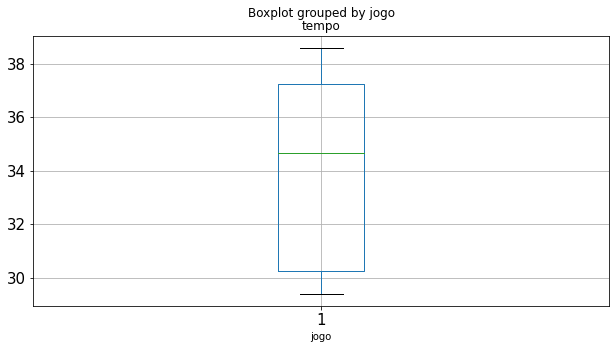

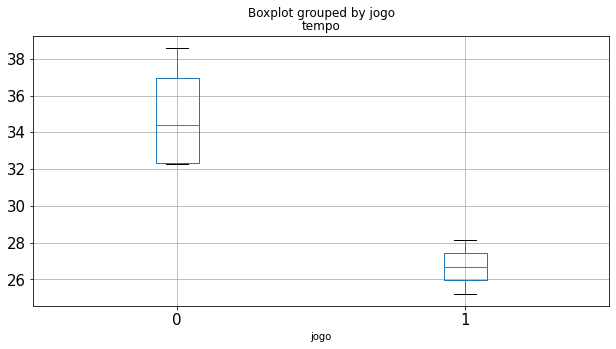

In [45]:
df.loc[time1].tail(10).boxplot('tempo','jogo',fontsize=15,figsize=(10,5)), 
df.loc[time2].tail(10).boxplot('tempo','jogo',fontsize=15,figsize=(10,5))
plt.show()

In [46]:
#Total do time em cada jogo
for x in df.index.unique():
    #print(x)
    lista = []
    for i in range(len(df)):
        if i % 2 == 0 and df.index[i] == x:
            lista.extend(df[i:i+1].abates.values) 

        elif i % 2 == 1 and df.index[i] == x:
            lista.extend(df[i:i+1].abates.values )
        
    print(x,lista)
    print()

DWG KIA [18, 15, 15, 14, 19, 21]

FunPlus Phoenix [2, 13, 18, 4, 4, 14]

RNG [16, 34, 19, 28, 10, 5]

PSG Talon [9, 21, 20, 2, 8, 33]

Hanwha Life [25, 9, 16, 15, 26, 15]

Fnatic [5, 13, 12, 26, 23, 15]

LNG Esports [1, 15, 20, 4, 22, 7]

Gen.G [8, 19, 23, 18, 7, 9]

T1 [22, 4, 17, 8, 13, 10]

DetonatioN FM [2, 7, 8, 2, 22, 4]

EDward Gaming [19, 16, 15, 15, 1, 4]

100 Thieves [6, 19, 3, 3, 20, 21]

Team Liquid [16, 1, 15, 12, 10, 16]

MAD Lions [9, 30, 6, 12, 15, 17]

Rogue [16, 9, 5, 7, 11, 21]

Cloud9 [8, 13, 7, 17, 18, 15]



In [47]:
# Soma do total de abates por jogo
for x in df.index.unique():
    #print(x)
    lista = []
    for i in range(len(df)):
        if i % 2 == 0 and df.index[i] == x:
            lista.extend(df[i:i+1].abates.values + df[i+1:i+2].abates.values)

        elif i % 2 == 1 and df.index[i] == x:
            lista.extend(df[i:i+1].abates.values + df[i-1:i].abates.values )
        
    print(x,lista)
    print()

DWG KIA [20, 24, 22, 18, 30, 36]

FunPlus Phoenix [20, 26, 23, 18, 22, 35]

RNG [25, 47, 35, 54, 18, 20]

PSG Talon [25, 30, 32, 17, 18, 48]

Hanwha Life [30, 30, 35, 17, 49, 20]

Fnatic [30, 47, 32, 54, 49, 48]

LNG Esports [9, 16, 26, 16, 29, 24]

Gen.G [9, 49, 38, 30, 29, 25]

T1 [24, 20, 20, 11, 14, 14]

DetonatioN FM [24, 26, 23, 17, 42, 14]

EDward Gaming [25, 20, 23, 17, 14, 25]

100 Thieves [25, 26, 20, 11, 42, 25]

Team Liquid [25, 16, 38, 16, 25, 25]

MAD Lions [25, 49, 26, 30, 25, 24]

Rogue [24, 24, 23, 24, 30, 35]

Cloud9 [24, 26, 22, 24, 22, 36]



In [48]:
#handicap abates (número excedente de abates sobre o time rival na partidade)
for x in df.index.unique():
    #print(x)
    lista = []
    for i in range(len(df)):
        if i % 2 == 0 and df.index[i] == x:
            lista.extend(df[i:i+1].abates.values - df[i+1:i+2].abates.values)

        elif i % 2 == 1 and df.index[i] == x:
            lista.extend(df[i:i+1].abates.values - df[i-1:i].abates.values )
        
    print(x,lista)
    print()

DWG KIA [16, 6, 8, 10, 8, 6]

FunPlus Phoenix [-16, 0, 13, -10, -14, -7]

RNG [7, 21, 3, 2, 2, -10]

PSG Talon [-7, 12, 8, -13, -2, 18]

Hanwha Life [20, -12, -3, 13, 3, 10]

Fnatic [-20, -21, -8, -2, -3, -18]

LNG Esports [-7, 14, 14, -8, 15, -10]

Gen.G [7, -11, 8, 6, -15, -7]

T1 [20, -12, 14, 5, 12, 6]

DetonatioN FM [-20, -12, -7, -13, 2, -6]

EDward Gaming [13, 12, 7, 13, -12, -17]

100 Thieves [-13, 12, -14, -5, -2, 17]

Team Liquid [7, -14, -8, 8, -5, 7]

MAD Lions [-7, 11, -14, -6, 5, 10]

Rogue [8, -6, -13, -10, -8, 7]

Cloud9 [-8, 0, -8, 10, 14, -6]



In [49]:
#Total de barons por jogo com percentual de jogos que tiveram menos que 1.5 barons ( menos que dois)
import numpy as np
for x in df.index.unique():
    ba=0
    #print(x)
    barons1 = []
    for i in range(len(df)):
        if i % 2 == 0 and df.index[i] == x:
            barons1.extend(df[i:i+1].barons.values)
            if df[i:i+1].barons.values <= 1:
                ba +=1

        elif i % 2 == 1 and df.index[i] == x:
            barons1.extend(df[i:i+1].barons.values)
            if df[i:i+1].barons.values <= 1:
                ba +=1
    print(x,barons1, '< 1.5 barons',np.round_(ba/len(barons1),2)*100,'%')
    print()


DWG KIA [1, 0, 2, 1, 2, 2] < 1.5 barons 50.0 %

FunPlus Phoenix [0, 1, 1, 0, 0, 1] < 1.5 barons 100.0 %

RNG [0, 2, 0, 0, 0, 0] < 1.5 barons 83.0 %

PSG Talon [1, 2, 2, 0, 0, 2] < 1.5 barons 50.0 %

Hanwha Life [2, 0, 2, 2, 1, 1] < 1.5 barons 50.0 %

Fnatic [0, 0, 1, 2, 0, 0] < 1.5 barons 83.0 %

LNG Esports [0, 0, 1, 0, 0, 0] < 1.5 barons 100.0 %

Gen.G [0, 1, 2, 1, 1, 0] < 1.5 barons 83.0 %

T1 [0, 1, 0, 1, 1, 1] < 1.5 barons 100.0 %

DetonatioN FM [0, 0, 0, 0, 2, 0] < 1.5 barons 83.0 %

EDward Gaming [1, 1, 1, 0, 0, 0] < 1.5 barons 100.0 %

100 Thieves [0, 1, 1, 0, 0, 1] < 1.5 barons 100.0 %

Team Liquid [1, 0, 1, 1, 0, 1] < 1.5 barons 100.0 %

MAD Lions [0, 2, 0, 2, 2, 2] < 1.5 barons 33.0 %

Rogue [1, 1, 0, 0, 0, 0] < 1.5 barons 100.0 %

Cloud9 [0, 1, 0, 1, 1, 0] < 1.5 barons 100.0 %



In [53]:
# Histórico de tempo dos jogos e Percentual dos jogos que foram finalizados depois de 27.5 minutos e antes de 33.5 minutos
import numpy as np

for x in df.index.unique():
    percentual_maior = 0
    percentual_menor = 0
    tempo1 = []
    for i in range(len(df)):
        if i % 2 == 0 and df.index[i] == x:
            tempo1.extend(df[i:i+1].tempo.values)
            if df[i:i+1].tempo.values > 27.5:
                percentual_maior +=1
            if df[i:i+1].tempo.values < 33.5:
                percentual_menor +=1

        elif i % 2 == 1 and df.index[i] == x:
            tempo1.extend(df[i:i+1].tempo.values)
            if df[i:i+1].tempo.values > 27.5:
                percentual_maior +=1
            if df[i:i+1].tempo.values < 33.5:
                percentual_menor +=1
                
        
        
    print(x,tempo1,'maior',np.round_(percentual_maior/len(tempo1),2)*100,'menor',np.round_(percentual_menor/len(tempo1),2)*100)
    print()

DWG KIA [29.41, 37.03, 32.27, 29.56, 37.29, 38.58] maior 100.0 menor 50.0

FunPlus Phoenix [29.41, 36.44, 34.25, 29.56, 28.14, 40.57] maior 100.0 menor 50.0

RNG [37.26, 30.5, 40.25, 37.31, 32.23, 36.12] maior 100.0 menor 33.0

PSG Talon [37.26, 38.06, 46.11, 29.59, 32.23, 36.36] maior 100.0 menor 33.0

Hanwha Life [31.42, 38.06, 40.25, 29.59, 43.15, 36.12] maior 100.0 menor 33.0

Fnatic [31.42, 30.5, 46.11, 37.31, 43.15, 36.36] maior 100.0 menor 33.0

LNG Esports [23.42, 29.06, 26.27, 30.13, 34.34, 31.22] maior 67.0 menor 83.0

Gen.G [23.42, 46.59, 38.29, 39.45, 34.34, 35.03] maior 83.0 menor 17.0

T1 [19.53, 36.49, 29.5, 31.46, 25.5, 27.02] maior 50.0 menor 83.0

DetonatioN FM [19.53, 33.07, 32.0, 25.54, 49.21, 27.02] maior 50.0 menor 83.0

EDward Gaming [28.31, 36.49, 32.0, 25.54, 25.5, 35.33] maior 67.0 menor 67.0

100 Thieves [28.31, 33.07, 29.5, 31.46, 49.21, 35.33] maior 100.0 menor 67.0

Team Liquid [27.08, 29.06, 38.29, 30.13, 37.14, 35.03] maior 83.0 menor 50.0

MAD Lions [27

In [54]:
# Percentual de barons por dia de campeonato
porcentagens = []
for j in range(0,8):
    maior = 0
    menor = 0
    d = df[12*j:12*(j+1)]
    for i in range(len(d)):
        if i%2 == 0:
            if sum(d[i:i+1].barons.values,d[i+1:i+2].barons.values) <= 1.5:
                menor +=1
            else:
                maior+=1
    porcentagens.append(np.round_(menor/(len(d)/2),2))
    print(np.round_(maior/(len(d)/2)*100,2),np.round_(menor/(len(d)/2)*100,2))

16.67 83.33
50.0 50.0
50.0 50.0
50.0 50.0
33.33 66.67
16.67 83.33
50.0 50.0
50.0 50.0


A exploração de dados pode ir a fundo em inúmeros outros pontos desse conjunto, durante essa breve passagem meu próposito foi dar uma visão geral e apresentar possibilidades a partir dos dados dE jogos do campeonato mundial de LOL.